In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


0    4949
1    4930
Name: blueWins, dtype: int64


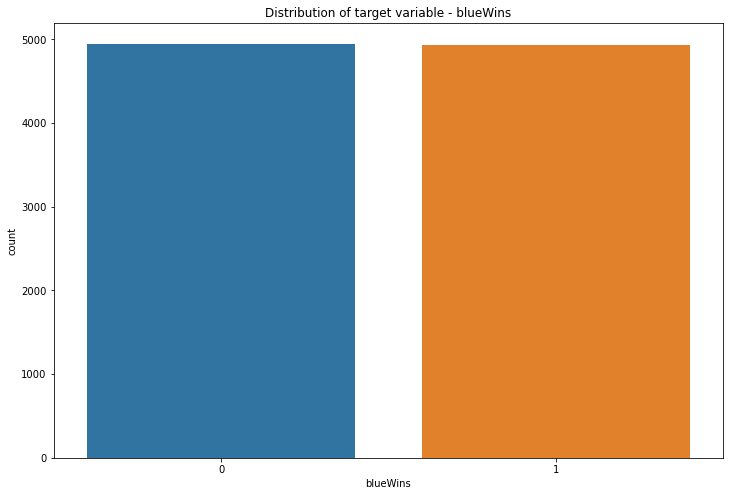

In [3]:
plt.figure(figsize=(12,8))
plt.title('Distribution of target variable - blueWins')
plt.ylabel('Amount of wins')
sns.countplot(df['blueWins'])
print(df['blueWins'].value_counts())

In [37]:
df = df.drop('gameId', axis=1)

In [38]:
X = df.drop('blueWins',axis=1)
y = df.blueWins
X_tr, X_test, y_tr, y_test = train_test_split(X,y,random_state=42)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

In [40]:
def modeling_function(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print('Training accuracy:', accuracy_score(y_train, train_preds))
    print("validation accuracy: ", accuracy_score(y_val, val_preds))

    return model

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

In [44]:
dtc = DecisionTreeClassifier(random_state=42)

In [45]:
dtc_fitted = modeling_function(dtc, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.6243928764166217


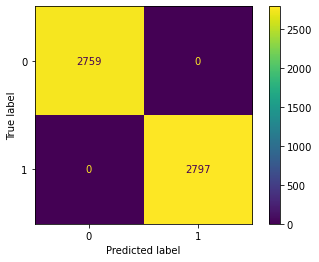

In [46]:
plot_confusion_matrix(dtc_fitted, X_train_scaled, y_train)

In [47]:
param_grid = {'criterion': ["gini", "entropy"],
             'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12]
             }

In [48]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy')

In [49]:
dtc_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14]},
             scoring='accuracy')

In [50]:
dtc_gs_model = dtc_gs.best_estimator_

In [51]:
dtc_gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6}

In [52]:
dtc2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

In [53]:
modeling_function(dtc2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7237221022318214
validation accuracy:  0.7398812736103616


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

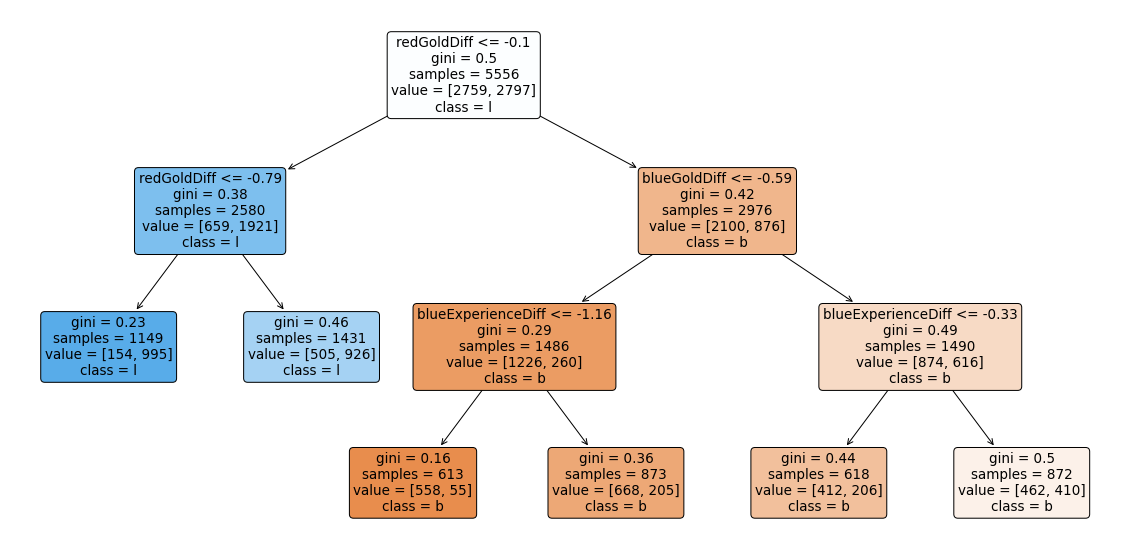

In [75]:


final_tree_model = DecisionTreeClassifier(max_depth = 4,max_leaf_nodes=6, random_state=42)
final_tree_model.fit(X_train_scaled, y_train)
predictions = final_tree_model.predict(X_val_scaled)
plt.figure(figsize=(20,10)) 
_ = plot_tree(final_tree_model, feature_names = X_train.columns, class_names = 'blueWins',
                rounded = True, proportion = False, precision = 2, filled = True)



In [77]:
logreg = LogisticRegression()

In [78]:
logreg_fitted = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7289416846652268
validation accuracy:  0.7420399352401511


In [79]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear', C=.13, random_state=42, max_iter=5000,verbose=4)

In [80]:
logreg2.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.13, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear', verbose=4)

In [81]:
logreg2_fitted= modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7307415406767459
validation accuracy:  0.7420399352401511


In [82]:
logreg3 = LogisticRegression(max_iter = 1000, penalty = 'l1', verbose = 1, C = .1, solver='liblinear')

In [83]:
logreg3.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear',
                   verbose=1)

In [84]:
logreg3_fitted = modeling_function(logreg3, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7312814974802015
validation accuracy:  0.7436589314624933
